In [118]:
import numpy as np
import matplotlib.pyplot as plt

For Atari, where observations have large spatial resolution, the rep- resentation function starts with a sequence of convolutions with stride 2 to reduce the spatial resolution. Specifically, starting with an input observation of resolution 96 × 96 and 128 planes (32 history frames of 3 colour channels each, concatenated with the corresponding 32 actions broadcast to planes), we downsample as follows: 1 convolu- tion with stride 2 and 128 output planes, output resolution 48 × 48; 2 residual blocks with 128 planes; 1 convolution with stride 2 and 256 output planes, output resolution 24 × 24; 3 residual blocks with 256 planes; average pooling with stride 2, output resolution 12 × 12; 3 residual blocks with 256 planes; average pooling with stride 2, output resolution 6 × 6. The kernel size is 3 × 3 for all operations.

conv -> 2 residula -> conv -> 3 residual -> avgPooling -> 3 residual -> avgPooling.

In [135]:
theta = 1.1
mu = np.array([0.6, 0.0])
sigma = 0.3
deltaT = 0.05

In [136]:
initX = np.array([0.5, 0]).T

In [137]:
historyX = []
time = 5
timeTable = [deltaT * i for i in range(int(time/deltaT)+1)]

In [138]:
def drift(x, _mu):
    return theta * (_mu - x)

In [139]:
def step(x, _mu, _theta, _sigma, _deltaT):
    # print(np.random.normal([0, 0], 1))
    # X_t = X * (1 - theta) * deltaT + theta * drift *deltaT + sigma * np.random.normal([0, 0], 1)
    X_t = x + _theta * (_mu - x)*deltaT + _sigma * np.random.normal([0], 1)[0] * np.sqrt(deltaT)
    return X_t

In [140]:
historyX.append(initX.copy())
X = initX
for t in range(int(time/deltaT)):
    x_1, x_2 = X[0], X[1]
    x_1_t, x_2_t = step(x_1, mu[0], theta, sigma, deltaT), step(x_2, mu[1], theta, sigma*2, deltaT)
    X_t = np.array([x_1_t, x_2_t]).T
    historyX.append(X_t.copy())
    X = X_t


In [141]:
historyX = np.array(historyX)

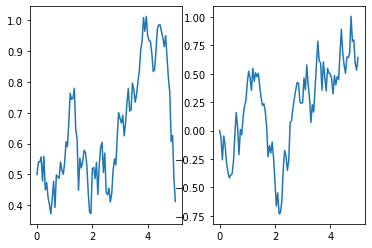

In [142]:
ax1 = plt.subplot(1, 2, 1)
plt.plot(timeTable, historyX[:, 0])

ax2 = plt.subplot(1, 2, 2)
plt.plot(timeTable, historyX[:, 1])

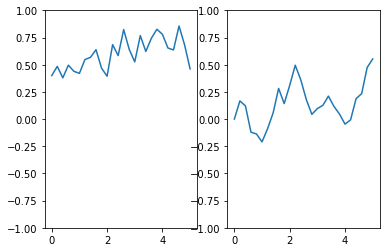

In [72]:
import random
import numpy as np
import matplotlib.pyplot as plt

def step(x, _mu, _theta, _sigma, _deltaT):
    # print(np.random.normal([0, 0], 1))
    # X_t = X * (1 - theta) * deltaT + theta * drift *deltaT + sigma * np.random.normal([0, 0], 1)
    X_t = x + _theta * (_mu - x)*_deltaT + _sigma * np.random.normal([0], 1)[0] * np.sqrt(_deltaT)
    return X_t
def plot():
    theta = 2
    mu2 = random.random() - 0.5
    mu = np.array([0.5, mu2])
    sigma = 0.3
    deltaT = 0.2
    initX = np.array([0.4, 0]).T
    historyX = []
    time = 5
    timeTable = [deltaT * i for i in range(int(time/deltaT)+1)]
    historyX.append(initX.copy())
    X = initX
    for t in range(int(time/deltaT)):
        x_1, x_2 = X[0], X[1]
        x_1_t, x_2_t = step(x_1, mu[0], theta, sigma, deltaT), step(x_2, mu[1], theta, sigma, deltaT)
        X_t = np.array([x_1_t, x_2_t]).T
        historyX.append(X_t.copy())
        X = X_t
    historyX = np.array(historyX)
    ax1 = plt.subplot(1, 2, 1)
    plt.ylim([-1, 1])
    plt.plot(timeTable, historyX[:, 0])

    ax2 = plt.subplot(1, 2, 2)
    plt.ylim([-1, 1])
    plt.plot(timeTable, historyX[:, 1])

plot()

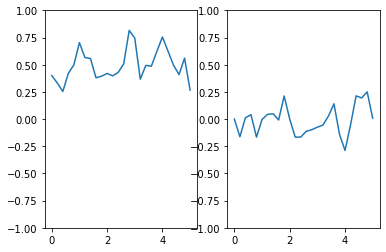

In [95]:
plot()

badgr + distributed rl + hierarchical rl -> 가능?

In [50]:
import random

In [57]:
(random.random() - 0.5)

-0.45302764500575654

In [52]:
random.random.__doc__

'random() -> x in the interval [0, 1).'